In [1]:
import pandas as pd

In [18]:
df = pd.read_csv('house_rentall_data.csv.txt')


In [19]:
df = df.drop(['Unnamed: 0', 'Sqft'], axis=1)


In [22]:
df.head()

,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,2,7,2,2,2,62000
1,5,7,4,2,2,78000
2,5,7,2,2,1,58000
3,2,7,3,2,2,45000
4,11,14,3,2,2,45000


In [23]:
df.duplicated().sum()

127

In [54]:
df.isnull().sum()

Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [21]:
df.shape

(645, 6)

In [24]:
df = df.drop_duplicates(df)
df

,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,2,7,2,2,2,62000
1,5,7,4,2,2,78000
2,5,7,2,2,1,58000
3,2,7,3,2,2,45000
4,11,14,3,2,2,45000
...,...,...,...,...,...,...
636,6,7,3,2,2,40000
637,9,9,4,2,2,60000
640,7,15,3,2,2,45000
641,4,10,1,1,1,24800


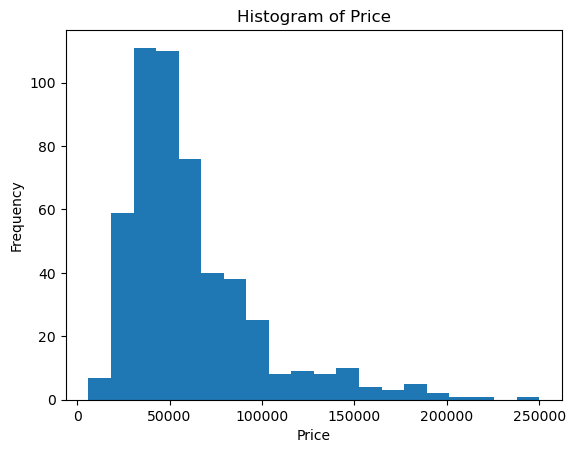

In [32]:
import matplotlib.pyplot as plt

plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

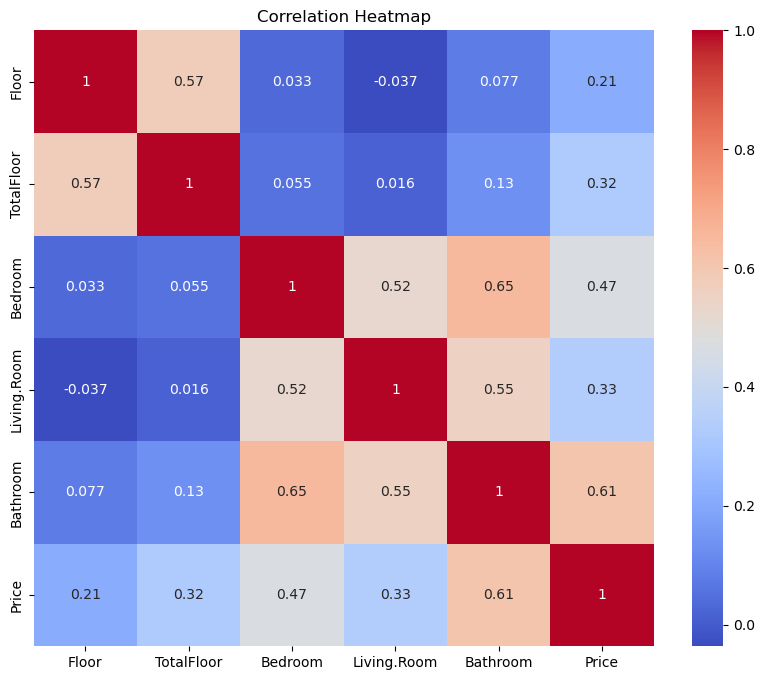

In [42]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
x = df.drop('Price', axis=1)
y = df['Price']

In [43]:
x_encoded = pd.get_dummies(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
model = LinearRegression()


In [48]:
model.fit(x_train, y_train)


LinearRegression()

In [50]:
y_pred = model.predict(x_test)


In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print(mse)
print(r2)

466098466.298753
0.602950288378239
